In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [2]:
mouse = 'reach1_4'

In [3]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [4]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed
mthal_neural_data_original = neural_data

(538, 61160)
(61160, 538)


load neural data (train and test)

In [5]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [6]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [7]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


load discerte_lables 

In [8]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

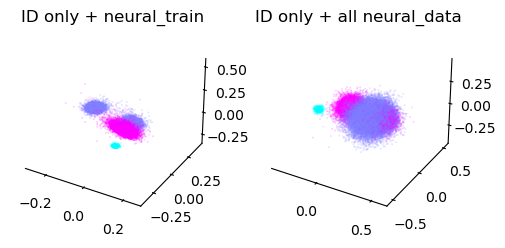

((48928, 32), (61160, 32))

In [9]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

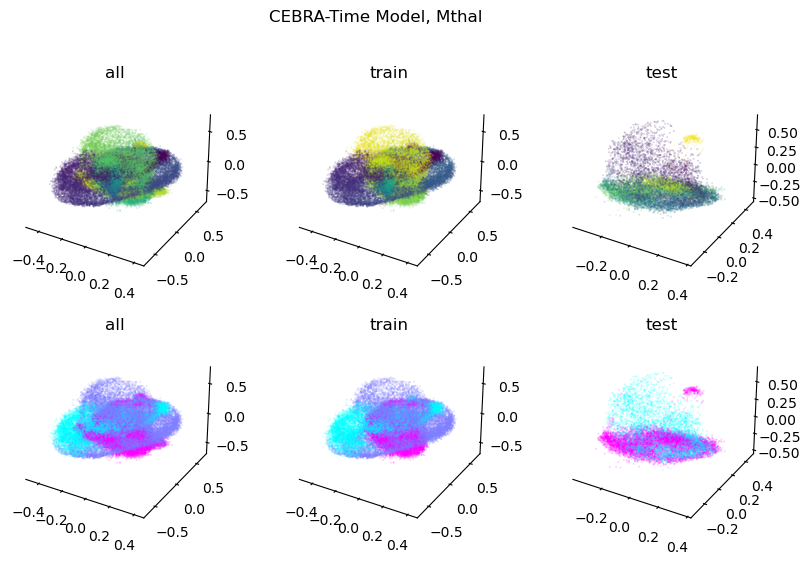

In [10]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

In [11]:
mthal_embedding_train = cebra_time_train
mthal_embedding_all = cebra_time_all

### 1.2 Load in M1 data 


In [12]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [13]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed
m1_neural_data_orignal = neural_data

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [14]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [15]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [16]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [17]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

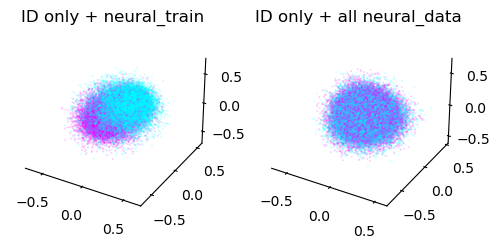

((48928, 32), (61160, 32))

In [18]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [19]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

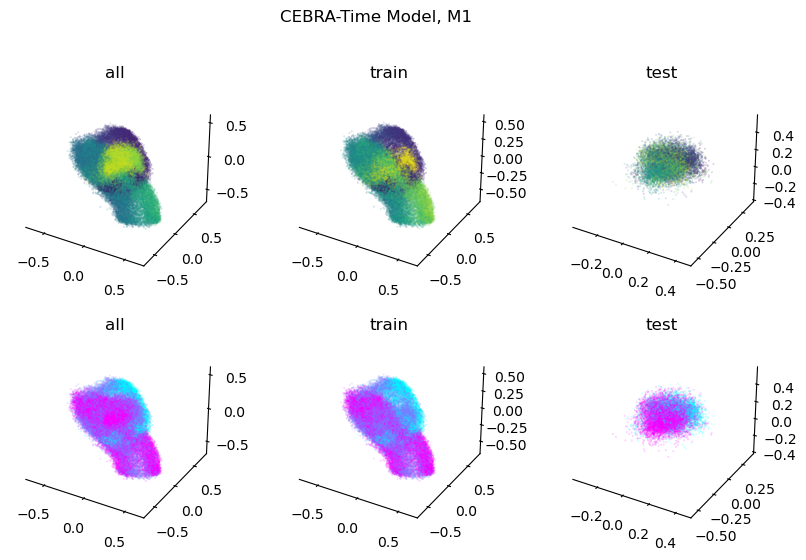

In [20]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

In [21]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all
m1_embedding_all.shape


(61160, 20)

### 4. Convert Data into correctly shapped df

Turning neural_data and embedding data into to a df that is time bins by units for neural data. Or timebins by embeddings for embedding data
- you need each row to be a single time bin
- each column is a unit. 


In [22]:
mthal_neural_data_original

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [20.,  0., 40., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [23]:
# Conver neural data into a df that is (bins , features) = (units, timebins)
data_mthal_neuralData_T = mthal_neural_data_original.T
data_mthal_neuralData = pd.DataFrame(data_mthal_neuralData_T)
data_mthal_neuralData = data_mthal_neuralData.ffill()
print(data_mthal_neuralData.shape)
data_mthal_neuralData.head(2)

(61160, 538)


,0,1,2,3,4,5,6,7,8,9,...,528,529,530,531,532,533,534,535,536,537
0,0.0,0.0,0.0,0.0,40.0,20.0,40.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0
1,0.0,0.0,0.0,0.0,40.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Conver neural data into a df that is (bins , features) = (units, timebins)\
data_m1_neuralData_T = m1_neural_data_orignal.T
data_m1_neuralData = pd.DataFrame(data_m1_neuralData_T)
data_m1_neuralData = data_m1_neuralData.ffill()
print(data_m1_neuralData.shape)
data_m1_neuralData.head(2)

(61160, 45)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,40.0,80.0,0.0,60.0,20.0,80.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,80.0,40.0,0.0,40.0,0.0,80.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


embeddings

<Axes3D: title={'center': 'ID only + neural_train'}>

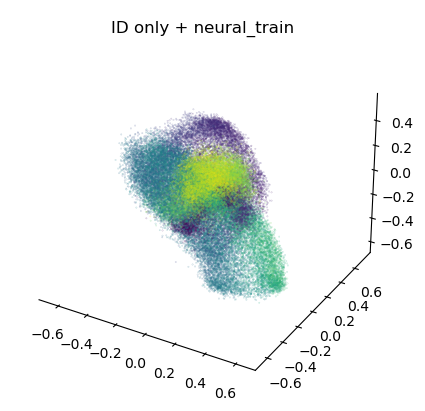

In [42]:
data_m1_embedding_T
cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='ID only + neural_train')

In [25]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_m1_embedding_T = m1_embedding_all
data_m1_embedding = pd.DataFrame(data_m1_embedding_T)
data_m1_embedding = data_m1_embedding.ffill()
print(data_m1_embedding.shape)
data_m1_embedding.head(2)

(61160, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.073559,0.244736,-0.168670,0.215833,0.158538,0.287898,-0.344083,0.228503,-0.337931,-0.316527,0.154006,-0.364403,0.045566,0.254337,0.083812,-0.245759,0.024908,0.083340,0.139286,-0.221331
1,-0.083142,0.241025,-0.165788,0.212391,0.172290,0.288479,-0.341305,0.232745,-0.348225,-0.320974,0.155636,-0.359394,0.052284,0.244396,0.087638,-0.240951,0.023535,0.090644,0.141055,-0.210465


In [26]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_mthal_embedding_T = mthal_embedding_all
data_mthal_embedding = pd.DataFrame(data_mthal_embedding_T)
data_mthal_embedding = data_mthal_embedding.ffill()
print(data_mthal_embedding.shape)
data_mthal_embedding.head(2)

(61160, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.015637,0.406981,0.166465,-0.204488,0.064744,-0.065235,-0.321402,0.131802,0.132240,-0.042215,...,0.094831,-0.044322,0.027663,-0.102902,0.064785,0.053596,0.098654,0.042460,0.062349,-0.119618
1,-0.025242,0.398936,0.177669,-0.190722,0.069609,-0.072161,-0.324818,0.124397,0.135454,-0.022158,...,0.097464,-0.020535,0.002429,-0.099985,0.051914,0.035560,0.096073,0.057147,0.055696,-0.135972


Covert which dataframes you want into data, so it can be fit into rest of code

In [27]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

check embeddings and FR of M1 and Mthal

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]


        unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]


        embedding_1 = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2 = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3 = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

        
        embedding_1_m1 = data_m1_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[2].to_numpy()[reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1, label=f'Reach {reach}')
        ax5.plot(embedding_2, label=f'Reach {reach}')
        ax6.plot(embedding_3,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1, embedding_2, embedding_3, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Mtahl First Embedding")
    ax5.set_title("Mtahl Second Embedding")
    ax6.set_title("Mtahl Third Embedding")

    ax7.set_title("M1 First Embedding")
    ax8.set_title("M1 Second Embedding")
    ax9.set_title("M1 Third Embedding")

    ax10.set_title("Mthal 3D Embedding")
    ax11.set_title("M1 3D Embedding")



    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()


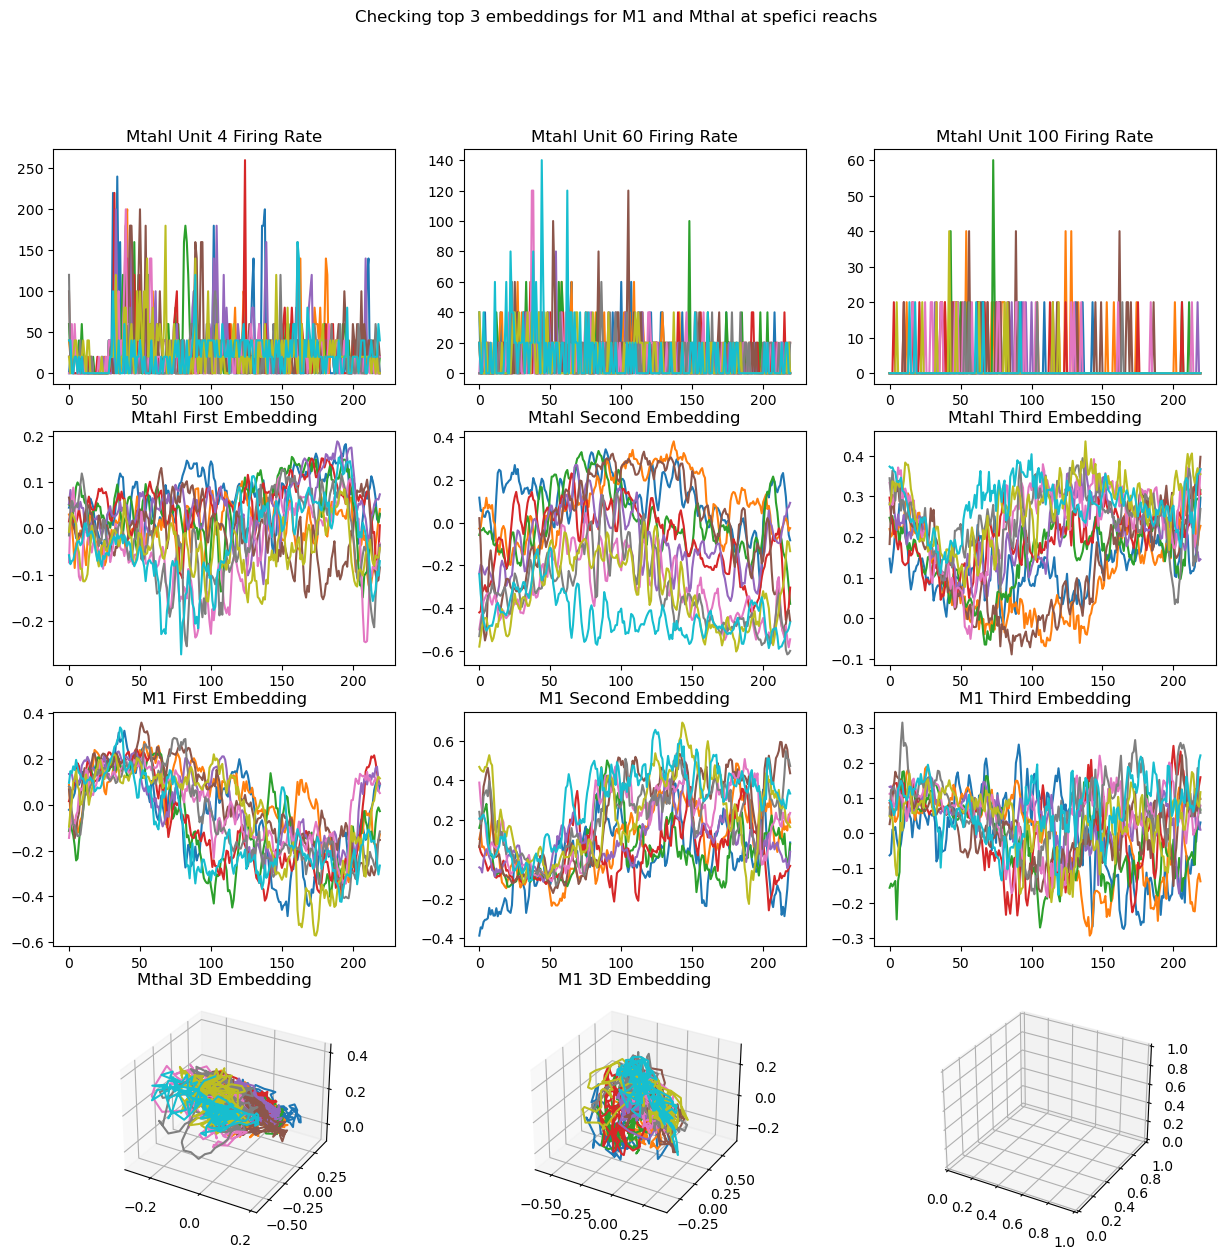

In [29]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(10, 20)  # Range of reaches to display

view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)


Convert Data frames into correct Input and Target Shapes

In [30]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [31]:
data_m1_embedding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.073559,0.244736,-0.168670,0.215833,0.158538,0.287898,-0.344083,0.228503,-0.337931,-0.316527,0.154006,-0.364403,0.045566,0.254337,0.083812,-0.245759,0.024908,0.083340,0.139286,-0.221331
1,-0.083142,0.241025,-0.165788,0.212391,0.172290,0.288479,-0.341305,0.232745,-0.348225,-0.320974,0.155636,-0.359394,0.052284,0.244396,0.087638,-0.240951,0.023535,0.090644,0.141055,-0.210465
2,-0.067732,0.232326,-0.150467,0.222213,0.203024,0.282449,-0.346628,0.224617,-0.347567,-0.323250,0.167538,-0.346018,0.036033,0.247537,0.073056,-0.221419,0.041755,0.078580,0.171407,-0.224706
3,-0.079314,0.221924,-0.162832,0.225552,0.205842,0.274671,-0.331109,0.226336,-0.354608,-0.347374,0.154271,-0.349889,0.031295,0.238256,0.080558,-0.224917,0.048340,0.071508,0.144241,-0.229517
4,-0.089083,0.200273,-0.155927,0.201847,0.232320,0.268641,-0.340082,0.264329,-0.345515,-0.334923,0.168902,-0.344538,0.030775,0.224337,0.103298,-0.240061,0.028711,0.091267,0.157220,-0.207364


In [32]:
data_mthal_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.015637,0.406981,0.166465,-0.204488,0.064744,-0.065235,-0.321402,0.131802,0.132240,-0.042215,...,0.094831,-0.044322,0.027663,-0.102902,0.064785,0.053596,0.098654,0.042460,0.062349,-0.119618
1,-0.025242,0.398936,0.177669,-0.190722,0.069609,-0.072161,-0.324818,0.124397,0.135454,-0.022158,...,0.097464,-0.020535,0.002429,-0.099985,0.051914,0.035560,0.096073,0.057147,0.055696,-0.135972
2,-0.016251,0.397371,0.181832,-0.192369,0.076351,-0.054525,-0.329100,0.128398,0.136818,-0.039634,...,0.098343,-0.015604,-0.001244,-0.085564,0.039650,0.041311,0.073873,0.066599,0.066728,-0.139580
3,-0.016547,0.375752,0.187431,-0.225253,0.069713,-0.059301,-0.327082,0.101649,0.128980,-0.050475,...,0.082466,-0.059466,0.019614,-0.071398,0.038000,0.076543,0.064734,0.062728,0.096867,-0.118303
4,-0.001769,0.355720,0.179429,-0.254513,0.040323,-0.056358,-0.304081,0.080656,0.119859,-0.054576,...,0.106141,-0.126688,0.040213,-0.099998,0.041366,0.066128,0.069432,0.030093,0.113554,-0.072679


Adapt the neural or embedding data into train, validate and test sets

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data_mthal_embedding and data_m1_embedding are your DataFrame names:
PREDICTORS = data_mthal_embedding.columns  # These are all columns in the Mthal embedding DataFrame
TARGET = data_m1_embedding.columns  # These are all columns in the M1 embedding DataFrame


scale the data. take the mean of columns and find SD and so on

In [34]:
data_mthal_embedding.shape

(61160, 32)

In [35]:
scale_taret = False

In [39]:
data_m1_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.073559,0.244736,-0.168670,0.215833,0.158538,0.287898,-0.344083,0.228503,-0.337931,-0.316527,0.154006,-0.364403,0.045566,0.254337,0.083812,-0.245759,0.024908,0.083340,0.139286,-0.221331
1,-0.083142,0.241025,-0.165788,0.212391,0.172290,0.288479,-0.341305,0.232745,-0.348225,-0.320974,0.155636,-0.359394,0.052284,0.244396,0.087638,-0.240951,0.023535,0.090644,0.141055,-0.210465
2,-0.067732,0.232326,-0.150467,0.222213,0.203024,0.282449,-0.346628,0.224617,-0.347567,-0.323250,0.167538,-0.346018,0.036033,0.247537,0.073056,-0.221419,0.041755,0.078580,0.171407,-0.224706
3,-0.079314,0.221924,-0.162832,0.225552,0.205842,0.274671,-0.331109,0.226336,-0.354608,-0.347374,0.154271,-0.349889,0.031295,0.238256,0.080558,-0.224917,0.048340,0.071508,0.144241,-0.229517
4,-0.089083,0.200273,-0.155927,0.201847,0.232320,0.268641,-0.340082,0.264329,-0.345515,-0.334923,0.168902,-0.344538,0.030775,0.224337,0.103298,-0.240061,0.028711,0.091267,0.157220,-0.207364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61155,-0.095531,0.181378,-0.177141,0.263717,0.246861,0.260238,-0.357943,0.272076,-0.311181,-0.374607,0.137764,-0.328312,0.068571,0.169818,0.076358,-0.237083,-0.023707,0.131934,0.207731,-0.074881
61156,-0.127120,0.136232,-0.143510,0.245727,0.283499,0.219227,-0.348333,0.341962,-0.278112,-0.399797,0.153132,-0.310918,0.066903,0.164066,0.110576,-0.224625,-0.051991,0.167424,0.184858,-0.036224
61157,-0.131593,0.108474,-0.161329,0.295284,0.272650,0.177852,-0.325221,0.325561,-0.283661,-0.416423,0.190755,-0.298415,0.074793,0.148940,0.116047,-0.221347,-0.036952,0.150087,0.215536,-0.008509
61158,-0.100682,0.128431,-0.203040,0.264292,0.262080,0.200020,-0.356114,0.326026,-0.278449,-0.390176,0.173168,-0.294710,0.081454,0.188061,0.108221,-0.214719,-0.012653,0.157400,0.214599,-0.055429


In [36]:
# Initialize scaler
scaler = StandardScaler()

# Scale Mthal embedding data (predictors)
data_mthal_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_mthal_embedding), columns=PREDICTORS)

# Optionally scale M1 embedding data (targets) if needed
if scale_taret:
    data_m1_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_m1_embedding), columns=TARGET)

# Use M1 embedding data as is if not scaling
data_m1_embedding_scaled = data_m1_embedding  # Not scaled, just renaming for consistency in downstream code

# Shapes and sample values
print(data_mthal_embedding_scaled.shape, data_m1_embedding_scaled.shape)
print(data_mthal_embedding_scaled.iloc[0][0])  # Showing the first element of the scaled predictors

data_mthal_embedding_scaled[0][0], data_m1_embedding_scaled[0][0]


(61160, 32) (61160, 20)
-0.0806805754378388


(-0.0806805754378388, -0.07355929166078568)

array([[-0.07355929,  0.2447356 , -0.16867019, ...,  0.08333971,
         0.13928634, -0.2213309 ],
       [-0.08314153,  0.24102518, -0.16578838, ...,  0.0906442 ,
         0.14105517, -0.2104653 ],
       [-0.06773181,  0.2323259 , -0.15046664, ...,  0.07857966,
         0.171407  , -0.22470635],
       ...,
       [-0.13159288,  0.10847395, -0.16132942, ...,  0.15008709,
         0.2155356 , -0.00850852],
       [-0.10068189,  0.12843147, -0.20303999, ...,  0.15739971,
         0.21459897, -0.05542858],
       [-0.09474239,  0.06355779, -0.14364311, ...,  0.15942097,
         0.21799606, -0.01894204]])

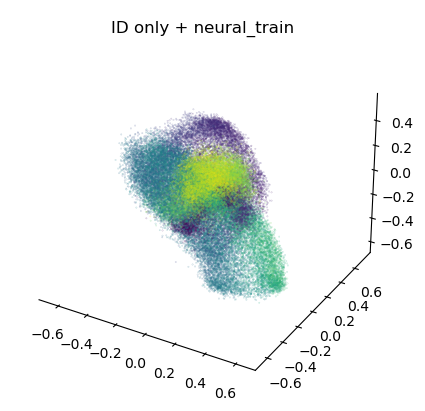

In [48]:
data_m1_embedding_T
cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='ID only + neural_train')
data_m1_embedding_T


In [37]:
data_m1_embedding_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.073559,0.244736,-0.168670,0.215833,0.158538,0.287898,-0.344083,0.228503,-0.337931,-0.316527,0.154006,-0.364403,0.045566,0.254337,0.083812,-0.245759,0.024908,0.083340,0.139286,-0.221331
1,-0.083142,0.241025,-0.165788,0.212391,0.172290,0.288479,-0.341305,0.232745,-0.348225,-0.320974,0.155636,-0.359394,0.052284,0.244396,0.087638,-0.240951,0.023535,0.090644,0.141055,-0.210465
2,-0.067732,0.232326,-0.150467,0.222213,0.203024,0.282449,-0.346628,0.224617,-0.347567,-0.323250,0.167538,-0.346018,0.036033,0.247537,0.073056,-0.221419,0.041755,0.078580,0.171407,-0.224706
3,-0.079314,0.221924,-0.162832,0.225552,0.205842,0.274671,-0.331109,0.226336,-0.354608,-0.347374,0.154271,-0.349889,0.031295,0.238256,0.080558,-0.224917,0.048340,0.071508,0.144241,-0.229517
4,-0.089083,0.200273,-0.155927,0.201847,0.232320,0.268641,-0.340082,0.264329,-0.345515,-0.334923,0.168902,-0.344538,0.030775,0.224337,0.103298,-0.240061,0.028711,0.091267,0.157220,-0.207364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61155,-0.095531,0.181378,-0.177141,0.263717,0.246861,0.260238,-0.357943,0.272076,-0.311181,-0.374607,0.137764,-0.328312,0.068571,0.169818,0.076358,-0.237083,-0.023707,0.131934,0.207731,-0.074881
61156,-0.127120,0.136232,-0.143510,0.245727,0.283499,0.219227,-0.348333,0.341962,-0.278112,-0.399797,0.153132,-0.310918,0.066903,0.164066,0.110576,-0.224625,-0.051991,0.167424,0.184858,-0.036224
61157,-0.131593,0.108474,-0.161329,0.295284,0.272650,0.177852,-0.325221,0.325561,-0.283661,-0.416423,0.190755,-0.298415,0.074793,0.148940,0.116047,-0.221347,-0.036952,0.150087,0.215536,-0.008509
61158,-0.100682,0.128431,-0.203040,0.264292,0.262080,0.200020,-0.356114,0.326026,-0.278449,-0.390176,0.173168,-0.294710,0.081454,0.188061,0.108221,-0.214719,-0.012653,0.157400,0.214599,-0.055429


array([[-0.01563655,  0.40698051,  0.1664646 , ...,  0.04245978,
         0.06234866, -0.11961813],
       [-0.02524223,  0.39893565,  0.17766862, ...,  0.05714657,
         0.05569629, -0.13597165],
       [-0.01625141,  0.3973712 ,  0.1818316 , ...,  0.06659906,
         0.06672847, -0.13957979],
       ...,
       [ 0.01602257,  0.12178735,  0.03989251, ..., -0.09342367,
        -0.03131341,  0.00626078],
       [-0.01735129,  0.18477808,  0.05706016, ..., -0.06163827,
        -0.0037645 , -0.02874155],
       [-0.0494817 ,  0.30645558,  0.11316252, ..., -0.0136865 ,
         0.04990213, -0.08918187]])

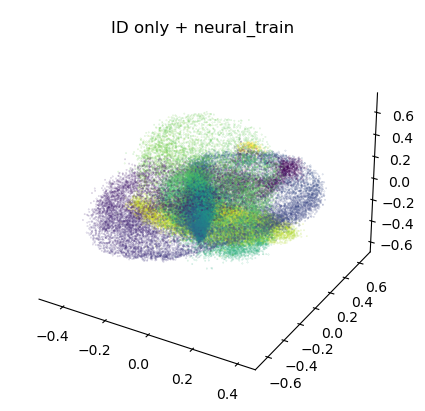

In [49]:

cebra.plot_embedding(embedding=data_mthal_embedding_T, embedding_labels='time', title='ID only + neural_train')
data_mthal_embedding_T

In [51]:

data_mthal_embedding_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.080681,1.966027,0.887474,-1.130074,0.330567,-0.395018,-1.559287,0.587797,0.752944,-0.195018,...,0.655527,-0.229951,0.158787,-0.706109,0.506225,0.287829,0.535840,0.236637,0.332831,-0.564133
1,-0.146548,1.928413,0.942797,-1.051840,0.354896,-0.439905,-1.576802,0.550785,0.772377,-0.083714,...,0.671298,-0.095854,-0.003555,-0.685642,0.420304,0.171905,0.522112,0.306466,0.298166,-0.641736
2,-0.084897,1.921098,0.963353,-1.061205,0.388615,-0.325614,-1.598761,0.570785,0.780625,-0.180695,...,0.676561,-0.068051,-0.027187,-0.584451,0.338430,0.208865,0.404029,0.351409,0.355653,-0.658858
3,-0.086924,1.820017,0.991001,-1.248088,0.355417,-0.356565,-1.588412,0.437070,0.733233,-0.240854,...,0.581467,-0.315330,0.107002,-0.485051,0.327417,0.435314,0.355422,0.333003,0.512700,-0.557894
4,0.014409,1.726355,0.951491,-1.414377,0.208438,-0.337492,-1.470475,0.332125,0.678079,-0.263615,...,0.723265,-0.694297,0.239524,-0.685737,0.349890,0.368374,0.380410,0.177838,0.599656,-0.341388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61155,-0.043517,1.284088,0.429526,-1.781569,-0.190393,-0.700742,-0.984848,-0.208656,-0.112334,0.347898,...,0.595473,-0.918890,-0.155216,-1.197868,0.108045,0.012646,0.459841,-0.260149,0.234724,0.030781
61156,0.086311,0.768463,0.309843,-1.724212,-0.203403,-1.041203,-1.158547,-0.105327,0.014366,0.465508,...,0.591843,-1.063794,-0.344929,-1.783206,-0.150140,-0.497944,0.614885,-0.431210,-0.150335,0.177707
61157,0.136409,0.632582,0.262486,-1.467970,-0.444789,-1.134394,-1.435113,0.032271,0.076842,0.472211,...,0.556123,-0.833714,-0.717246,-2.030353,-0.177338,-0.594762,0.748924,-0.409428,-0.155229,0.033209
61158,-0.092439,0.927101,0.347256,-1.367782,-0.367704,-1.151032,-1.744824,0.284352,0.271517,0.251280,...,0.423525,-0.521625,-0.581928,-1.632985,-0.162842,-0.264039,0.698854,-0.258303,-0.011675,-0.132890


Split scaled Data into Train, Validate, and Test Sets

In [52]:
# Combine scaled data into a single DataFrame if needed for splitting (here, not technically necessary)
# We can split directly using indices because our data is already aligned in time

# Determine split sizes
total_samples = len(data_mthal_embedding)
train_size = int(0.7 * total_samples)
valid_size = int(0.85 * total_samples)

# Split data into training, validation, and test sets
train_x = data_mthal_embedding_scaled.iloc[:train_size].to_numpy()
train_y = data_m1_embedding_scaled.iloc[:train_size].to_numpy()

valid_x = data_mthal_embedding_scaled.iloc[train_size:valid_size].to_numpy()
valid_y = data_m1_embedding_scaled.iloc[train_size:valid_size].to_numpy()

test_x = data_mthal_embedding_scaled.iloc[valid_size:].to_numpy()
test_y = data_m1_embedding_scaled.iloc[valid_size:].to_numpy()


In [53]:
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)
print("Validation X:", valid_x.shape)
print("Validation Y:", valid_y.shape)
print("Test X:", test_x.shape)
print("Test Y:", test_y.shape)


Train X: (42812, 32)
Train Y: (42812, 20)
Validation X: (9174, 32)
Validation Y: (9174, 20)
Test X: (9174, 32)
Test Y: (9174, 20)


### 2. Construct RNN

In [54]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [55]:
input = train_x
target = train_y
test_input = test_x
test_target = test_y
input.shape, target.shape, test_input.shape,  test_target.shape

((42812, 32), (42812, 20), (9174, 32), (9174, 20))

In [56]:
# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target) # Reshape to (222, 210, 32)
test_input_tensor = torch.tensor(test_input)
test_target_tensor = torch.tensor(test_target)


# Convert the existing tensors to float32 if they are not already
input_tensor = input_tensor.float()
target_tensor = target_tensor.float()
test_input_tensor = test_input_tensor.float()
test_target_tensor = test_target_tensor.float()

# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)
test_dataset = TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
input_tensor.shape, target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([42812, 32]),
 torch.Size([42812, 20]),
 torch.Size([9174, 32]),
 torch.Size([9174, 20]))

In [57]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# # Create a TensorDataset
# dataset = TensorDataset(input_tensor, target_tensor)
# print(len(dataset))

# # Split into train and validation
# train_size = int(0.8 * len(dataset))
# print(train_size)
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_dataset = [(input_tensor, target_tensor)]
val_dataset = [(torch.tensor(valid_x).float(), torch.tensor(valid_y).float())]

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

testing batching and randomizing inputs

In [58]:
input_tensor.shape, target_tensor.shape

(torch.Size([42812, 32]), torch.Size([42812, 20]))

In [59]:
from torch.utils.data import Dataset, DataLoader
import random

class WeatherDataset(Dataset):
    def __init__(self, features, labels, sequence_length=7):
        self.features = features
        self.labels = labels
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.labels) - self.sequence_length + 1

    def __getitem__(self, index):
        idx = random.randint(0, len(self.labels) - self.sequence_length)
        return (self.features[idx:idx + self.sequence_length], self.labels[idx:idx + self.sequence_length])

# Assuming 'features' and 'labels' are your full datasets
dataset = WeatherDataset(input_tensor, target_tensor)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)  # Shuffle here might not be necessary


PyTorch rnn #1
- no dropouts

In [60]:
# Adjusting the model for the specific neural data task
class NeuralRNN(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, num_layers=1, output_size=1):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()



pytorch rnn #2
- added drop outs

In [61]:
input_tensor.shape, target_tensor.shape

(torch.Size([42812, 32]), torch.Size([42812, 20]))

In [62]:
input_size = len(input_tensor[1].detach().numpy())
output_size = len(target_tensor[1].detach().numpy())
print(input_size, output_size)

class NeuralRNN(nn.Module):
    def __init__(self, input_size=input_size, hidden_size=64, num_layers=1, output_size=output_size, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Apply dropout to each RNN layer except the last layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

32 20


### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [63]:
num_epochs = 10000
lr = 0.0001
weight_decay = False
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [64]:
i = 0
for inputs, targets in train_loader:
    i +=1
    print(f'Epoch {i}')
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][0].shape, inputs[0][0])
    print(targets[0][0].shape, targets[0][0])
    break

Epoch 1
torch.Size([1, 7, 32])
torch.Size([1, 7, 20])
torch.Size([32]) tensor([ 1.3424,  0.5790, -0.4976,  0.1789, -0.4222, -0.4813, -1.1449,  1.7640,
         1.8366, -1.3170, -1.0109,  1.5466, -0.5983, -1.1619,  0.7894,  0.8783,
         0.8824, -0.5310,  0.2116,  0.3082, -2.0359,  1.6420,  1.0571, -0.3191,
         0.4706, -0.8302, -0.9025, -0.4524, -1.0328,  0.8293, -0.1972,  0.2730])
torch.Size([20]) tensor([ 0.1042, -0.1947, -0.2499, -0.2581, -0.2749, -0.1105, -0.0556,  0.2933,
         0.0825,  0.1829, -0.0498,  0.0251,  0.2180,  0.0938,  0.3025, -0.2049,
        -0.0371,  0.5576,  0.1627,  0.2708])


In [65]:

for inputs, targets in val_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break


torch.Size([1, 9174, 32])
torch.Size([1, 9174, 20])
torch.Size([32]) tensor([-0.0656, -1.0645,  0.1526,  1.5407, -0.0449,  0.9749,  1.3168,  0.7992,
         0.2321, -0.1120, -1.2899, -0.7732, -1.1484,  0.0547,  0.5906,  1.5371,
         1.4886,  1.7873,  2.5166, -1.4346, -0.2287, -0.7019,  0.6468, -0.2725,
         1.2711,  1.1607, -0.7699, -0.5172, -0.6951, -0.2138, -0.2654, -0.7126])
torch.Size([20]) tensor([-0.1611,  0.2899, -0.2934,  0.3691, -0.1877,  0.0039, -0.1807, -0.2394,
         0.0576, -0.1604,  0.3255, -0.0062,  0.3318, -0.2425, -0.3162,  0.1062,
         0.0093, -0.0235, -0.0502,  0.3523])


In [68]:
num_epochs = 1000
lr = 0.0001
weight_decay = False
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [69]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task


optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr)  # Using Adam optimizer

if weight_decay:
    optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.01)  # Adding L2 regularization

predictions = []
valid_predictions = []
weight_history = []
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
           # Print epoch statistics every 100 epochs
        # if epoch % 20 == 0:
        #     print(epoch)
        #     print(inputs[0][epoch])
        #     print(targets[0][epoch])
        #     print(outputs[0,:,:])
        #     print(outputs[0,:,:].shape)
        #     print('')
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch

    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            # if epoch % 20 == 0:
            #     print('val')
            #     print(inputs[0][epoch])
            #     print(targets[0][epoch])
            #     print(outputs_val[0][epoch])
            #     print('')
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch

    
    # # Early stopping check
    if early_stop:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            stop_counter = 0  # reset the counter if improvement is seen
        else:
            stop_counter += 1
        if stop_counter >= early_stopping_patience:
            print(f"Stopping early at epoch {epoch+1}")
            break

    # Print epoch statistics every 100 epochs
    print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

    if epoch % 100 == 0:        
        print(inputs[0][epoch])
        print(targets[0][epoch])
        print(outputs[0,:,:])
        print(outputs[0,:,:].shape)
        print('')


In [58]:
train_x[-1], train_y[-1],
train_y.shape, train_x.shape

((42812, 20), (42812, 32))

In [59]:
# output_predictions = all_outputs.detach().numpy()
# print(output_predictions.shape)
# output_predictions = output_predictions.squeeze(axis=2)
# output_predictions_batch1 = output_predictions[:,0]
# output_predictions_batch2 = output_predictions[:,1]
# output_predictions_batch3 = output_predictions[:,2]
# output_predictions_batch4 = output_predictions[:,3]
# output_predictions_batch5 = output_predictions[:,4]
# output_predictions_batch6 = output_predictions[:,5]
# output_predictions_batch7 = output_predictions[:,6]

# output_predictions_batch1.shape

In [60]:
output_predictions = all_outputs.detach().numpy()
print(output_predictions.shape)

# If you want each batch's data separately
output_predictions_batch1 = output_predictions[:, 0, :]  # All time steps, first batch, all features
output_predictions_batch2 = output_predictions[:, 1, :]
output_predictions_batch3 = output_predictions[:, 2, :]
output_predictions_batch4 = output_predictions[:, 3, :]
output_predictions_batch5 = output_predictions[:, 4, :]
output_predictions_batch6 = output_predictions[:, 5, :]
output_predictions_batch7 = output_predictions[:, 6, :]

# Example: Print the shape of the first batch's data
print(output_predictions_batch1.shape)


(42806, 7, 20)
(42806, 20)


In [63]:
# Define the batch and the time bins range
batch_index = 0  # Batch 7 in human-readable form, but index 6 in zero-based indexing
time_bins_range = slice(0, -1)  # This is equivalent to [0:220]
print(time_bins_range)
feature_index = 0  # First column of the embeddings

# Extract the specific slice of data
rnn_output_embeddings_1 = output_predictions[time_bins_range, batch_index, feature_index]
rnn_output_embeddings_2 = output_predictions[time_bins_range, batch_index, 1]
rnn_output_embeddings_3 = output_predictions[time_bins_range, batch_index, 2]


# Printing the shape and the data
print("Shape of selected embeddings:", rnn_output_embeddings_2.shape,rnn_output_embeddings_3.shape)


slice(0, -1, None)
Shape of selected embeddings: (42805,) (42805,)


In [64]:
print(train_y.shape)
# target_m1_embeddings = train_y.squeeze(axis=1)
target_m1_embeddings = train_y
target_m1_embeddings.shape
target_m1_embeddings_df = pd.DataFrame(target_m1_embeddings)
target_m1_embeddings_df.head(2)


(42812, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.073559,0.244736,-0.168670,0.215833,0.158538,0.287898,-0.344083,0.228503,-0.337931,-0.316527,0.154006,-0.364403,0.045566,0.254337,0.083812,-0.245759,0.024908,0.083340,0.139286,-0.221331
1,-0.083142,0.241025,-0.165788,0.212391,0.172290,0.288479,-0.341305,0.232745,-0.348225,-0.320974,0.155636,-0.359394,0.052284,0.244396,0.087638,-0.240951,0.023535,0.090644,0.141055,-0.210465


In [65]:
rnn_output_embeddings_1_df = pd.DataFrame(rnn_output_embeddings_1)
rnn_output_embeddings_2_df = pd.DataFrame(rnn_output_embeddings_2)
rnn_output_embeddings_3_df = pd.DataFrame(rnn_output_embeddings_3)


In [71]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(0, 2)  # Range of reaches to display

# Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
for reach in reaches_to_view:
    # Calculate the start and end indices for each reach
    reach_start = reach * 220
    reach_end = reach_start + 220
    embedding_1_rnn = rnn_output_embeddings_1_df[0].to_numpy()[reach_start:reach_end]
    embedding_2_rnn = rnn_output_embeddings_2_df[0].to_numpy()[reach_start:reach_end]
    embedding_3_rnn = rnn_output_embeddings_3_df[0].to_numpy()[reach_start:reach_end]

    embedding_1_m1 = target_m1_embeddings_df[0].to_numpy()[reach_start:reach_end]
    embedding_2_m1 = target_m1_embeddings_df[1].to_numpy()[reach_start:reach_end]
    embedding_3_m1 = target_m1_embeddings_df[2].to_numpy()[reach_start:reach_end]
    embedding_1_rnn[0:3], embedding_1_m1[0:3]

In [72]:
data_mthal_neuralData_T

array([[ 0.,  0.,  0., ..., 20.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 40.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]

        embedding_1_rnn = rnn_output_embeddings_1_df[0].to_numpy()[reach_start:reach_end]
        embedding_2_rnn = rnn_output_embeddings_2_df[0].to_numpy()[reach_start:reach_end]
        embedding_3_rnn = rnn_output_embeddings_3_df[0].to_numpy()[reach_start:reach_end]

        embedding_1_m1 = target_m1_embeddings_df[0].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = target_m1_embeddings_df[1].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = target_m1_embeddings_df[2].to_numpy()[reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1_rnn, label=f'Reach {reach}')
        ax5.plot(embedding_2_rnn, label=f'Reach {reach}')
        ax6.plot(embedding_3_rnn,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1_rnn, embedding_2_rnn, embedding_3_rnn, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Rnn Prediction 1st Embedding")
    ax5.set_title("Rnn Prediction 2nd Embedding")
    ax6.set_title("Rnn Prediction 3rd Embedding")

    ax7.set_title("M1 1st Embedding")
    ax8.set_title("M1 2nd Embedding")
    ax9.set_title("M1 3rd Embedding")

    ax10.set_title("Rnn 3D Embedding")
    ax11.set_title("M1 3D Embedding")


    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()


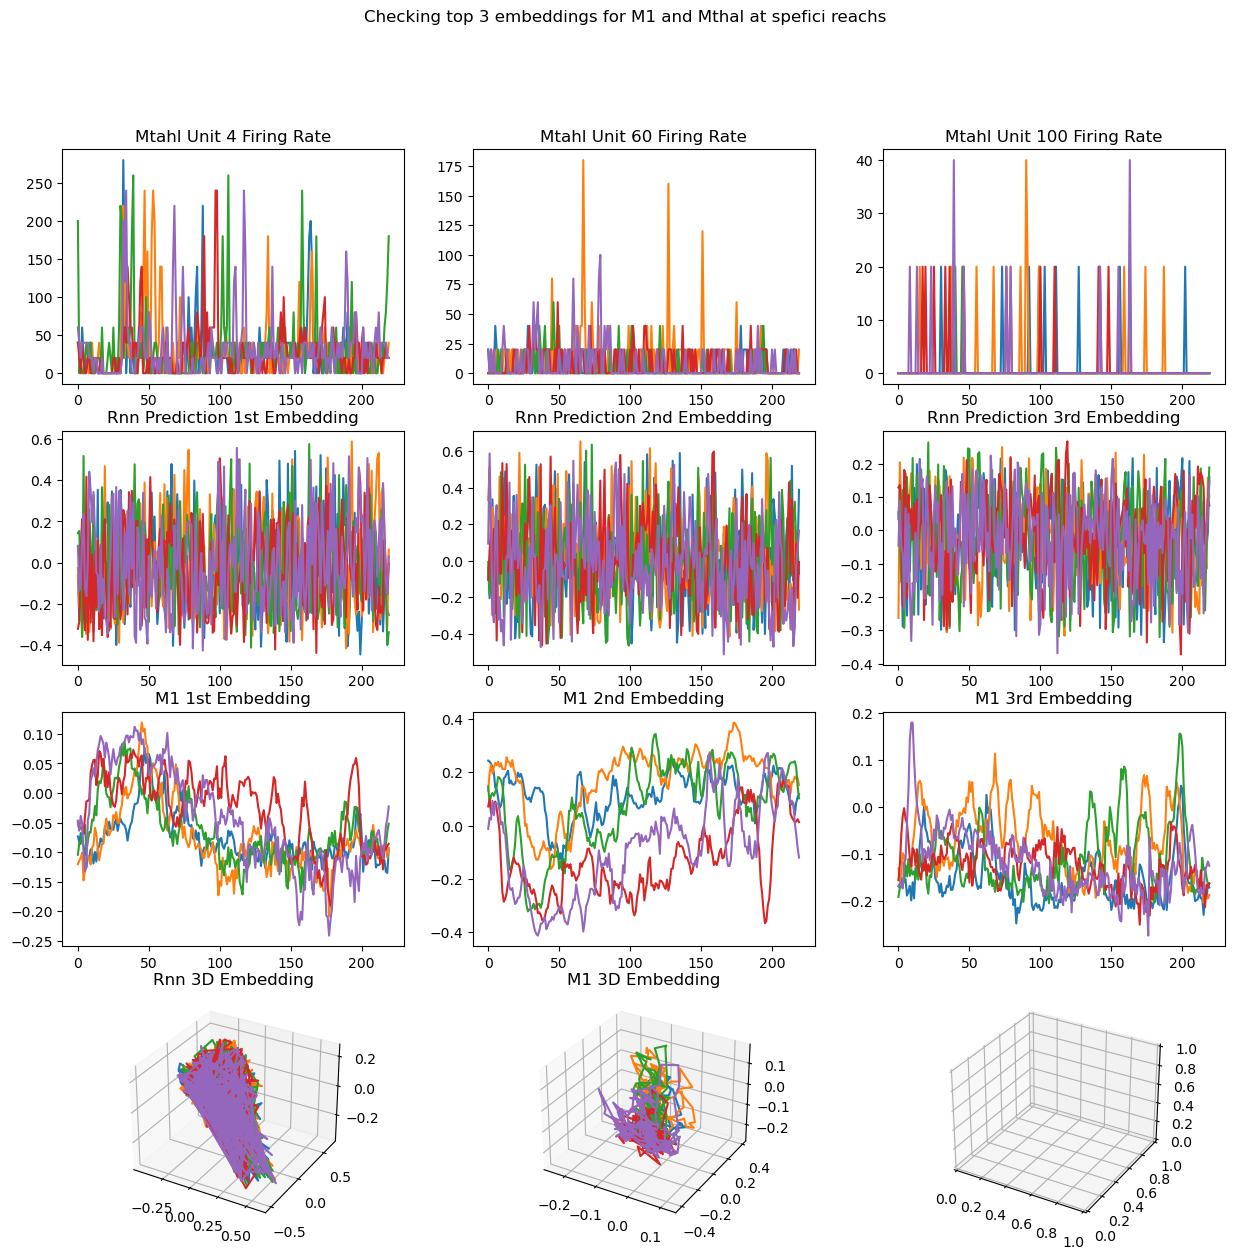

In [77]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(0, 5)  # Range of reaches to display

view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

NameError: name 'rnn_output_embedding' is not defined

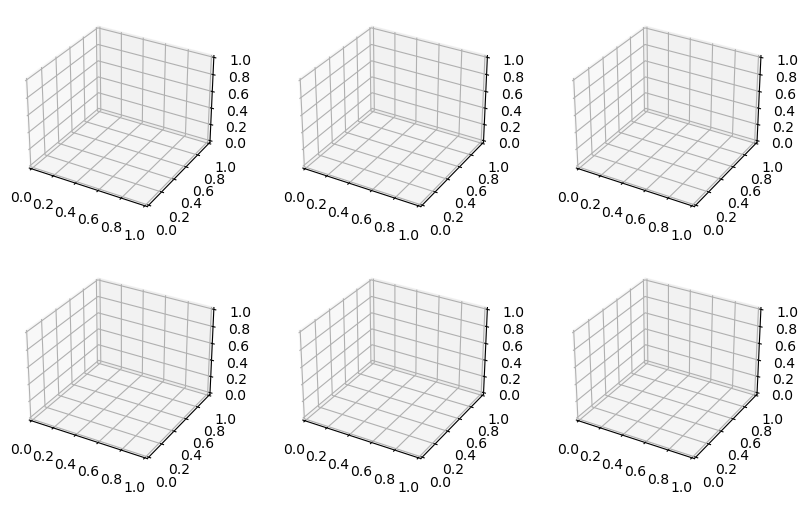

In [78]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)

#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

In [79]:
# import matplotlib.pyplot as plt

# day_start = 0
# day_end = 10
# plt.figure(figsize=(15, 7))
# # plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
# plt.plot(target_weather[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
# plt.plot(rnn_output_embeddings_1_df[day_start:day_end], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
# plt.plot(rnn_output_embeddings_6_df[day_start:day_end], label='Predicted Weather 6', linestyle='-', color='green', alpha=0.75)

# plt.title('Comparison of Actual and Predicted Weather')
# plt.xlabel('Days')
# plt.ylabel('Weather Metric')
# plt.legend()
# plt.grid(True)
# plt.show()

# day_start = -10
# day_end = -1
# plt.figure(figsize=(15, 7))
# # plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
# plt.plot(target_weather[day_start:day_end], label='Target Weather', linestyle='-', color='red', alpha=0.75)
# plt.plot(rnn_output_embeddings_1_df[day_start:day_end], label='Predicted embedding 1', linestyle='-', color='blue', alpha=0.75)
# plt.plot(rnn_output_embeddings_6_df[day_start:day_end], label='Predicted embedding 7', linestyle='-', color='green', alpha=0.75)

# plt.title('Comparison of Actual and Predicted Weather')
# plt.xlabel('Days')
# plt.ylabel('Weather Metric')
# plt.legend()
# plt.grid(True)
# plt.show()

### 4. Test rnn on unseen data

In [80]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([9174, 32]), torch.Size([9174, 20]))

create dataloader for unseen test data (data witheld from both training and validation)

In [81]:
from torch.utils.data import Dataset, DataLoader
import torch

class SequentialWeatherDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: [2027, 3]
        self.labels = torch.tensor(labels, dtype=torch.float32)  # shape: [2027, 1]

    def __len__(self):
        return len(self.features) - 7 + 1  # Account for the last 7-day window

    def __getitem__(self, index):
        # Return 7 consecutive days of features and labels
        return self.features[index:index + 7], self.labels[index:index + 7]

# Assuming test_input_tensor and test_target_tensor are your datasets
test_dataset = SequentialWeatherDataset(test_input_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


C:\Users\user\AppData\Local\Temp\ipykernel_14248\2933115460.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)  # shape: [2027, 3]
C:\Users\user\AppData\Local\Temp\ipykernel_14248\2933115460.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)  # shape: [2027, 1]


Run a single pass of the already trained rnn on this unseen data
- makes prediction on unseen data (does not update the rnn in anyway)

In [82]:
neural_rnn.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_losses = []

with torch.no_grad():  # No gradients needed for evaluation, which saves memory and computations
    for inputs, targets in test_loader:
        outputs = neural_rnn(inputs)
        loss = loss_function(outputs, targets)
        test_losses.append(loss.item())
        test_predictions.extend(outputs.cpu().numpy())
        test_targets.extend(targets.cpu().numpy())

test_weather_predictions = np.array(test_predictions)
test_weather_targets = np.array(test_targets)
print(test_weather_predictions.shape, test_weather_targets.shape)
# Calculate average test loss
average_test_loss = sum(test_losses) / len(test_losses)
print(f"Average Test Loss: {average_test_loss:.4f}")


(9168, 7, 20) (9168, 7, 20)
Average Test Loss: 0.0849


evaluate rnn's prediction on unseen data

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Flatten the lists if they are nested due to sequence predictions
test_predictions = [item for sublist in test_predictions for item in sublist]
test_targets = [item for sublist in test_targets for item in sublist]

mse = mean_squared_error(test_targets, test_predictions)
mae = mean_absolute_error(test_targets, test_predictions)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Mean Absolute Error on Test Set: {mae:.4f}")


Mean Squared Error on Test Set: 0.0849
Mean Absolute Error on Test Set: 0.2360


extract out rnn's prediction from output_tensor

In [84]:
# Assuming test_weather_predictions is your array with shape (time bins, 7, embeddings)
batch_index = 6  # For batch number 3

# Select all time bins for this batch, and all embedding dimensions
selected_batch_predictions_1 = test_weather_predictions[:, 0, 1]
selected_batch_predictions_2 = test_weather_predictions[:, 0, 2]
selected_batch_predictions_6 = test_weather_predictions[:, 0, 6]

test_weather_targets_1 = test_weather_targets[:,0,1]
test_weather_targets_2 = test_weather_targets[:,0,2]
test_weather_targets_6 = test_weather_targets[:,0,6]


# Now, selected_batch_predictions will have the shape (time bins, embeddings)
print("Shape of selected batch predictions:", selected_batch_predictions_1.shape)


Shape of selected batch predictions: (9168,)


plot and compare the rnn's predictions on the unseen data (after just a single pass)

NameError: name 'rnn_output_embedding' is not defined

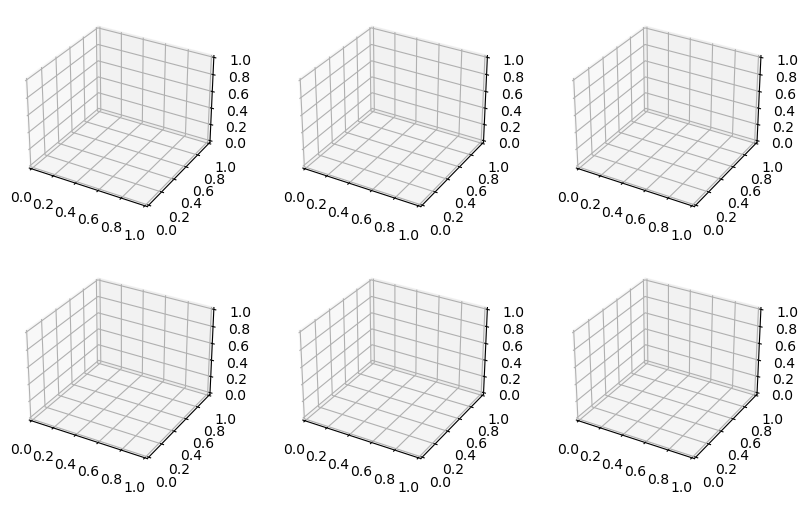

In [85]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)

#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

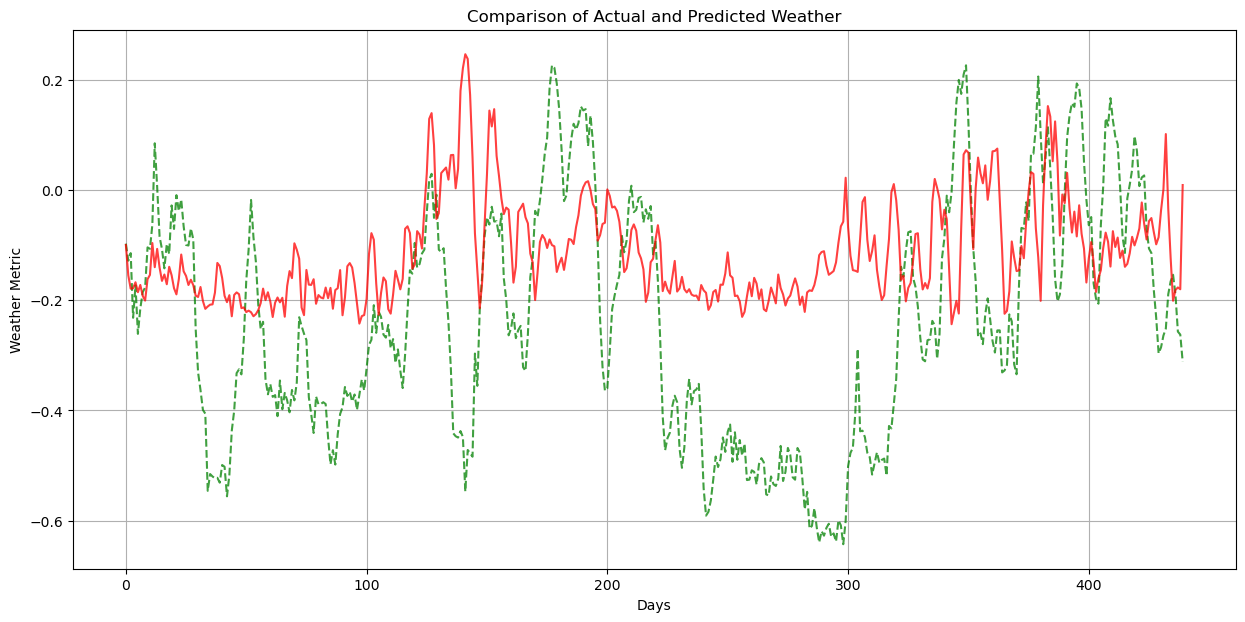

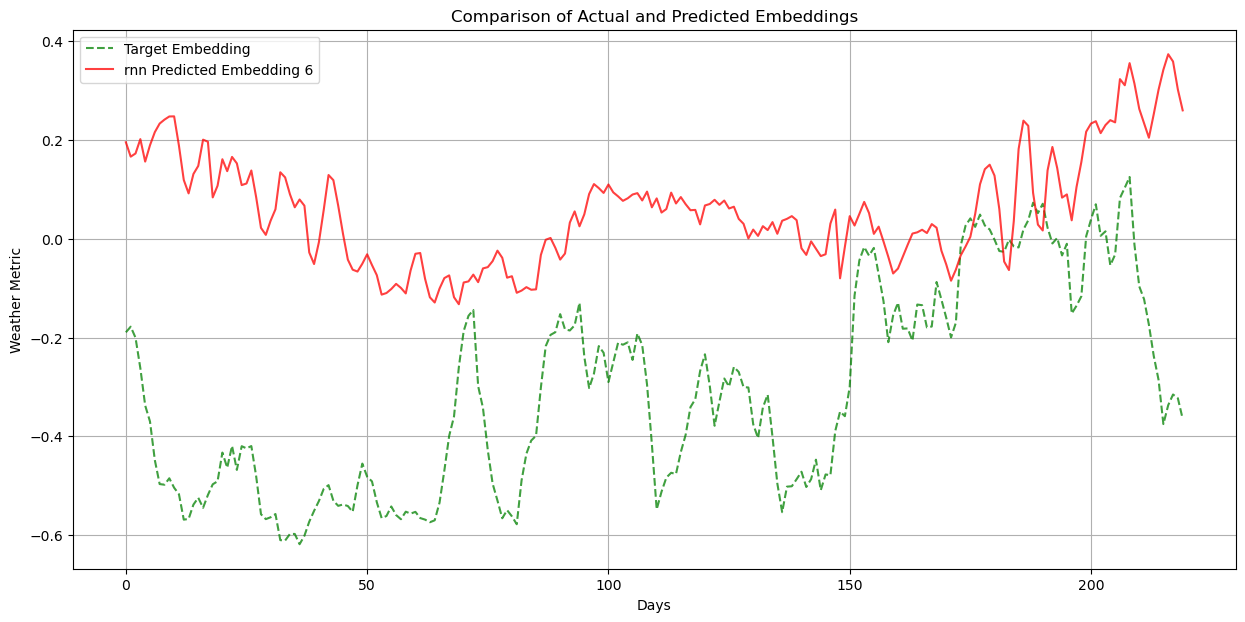

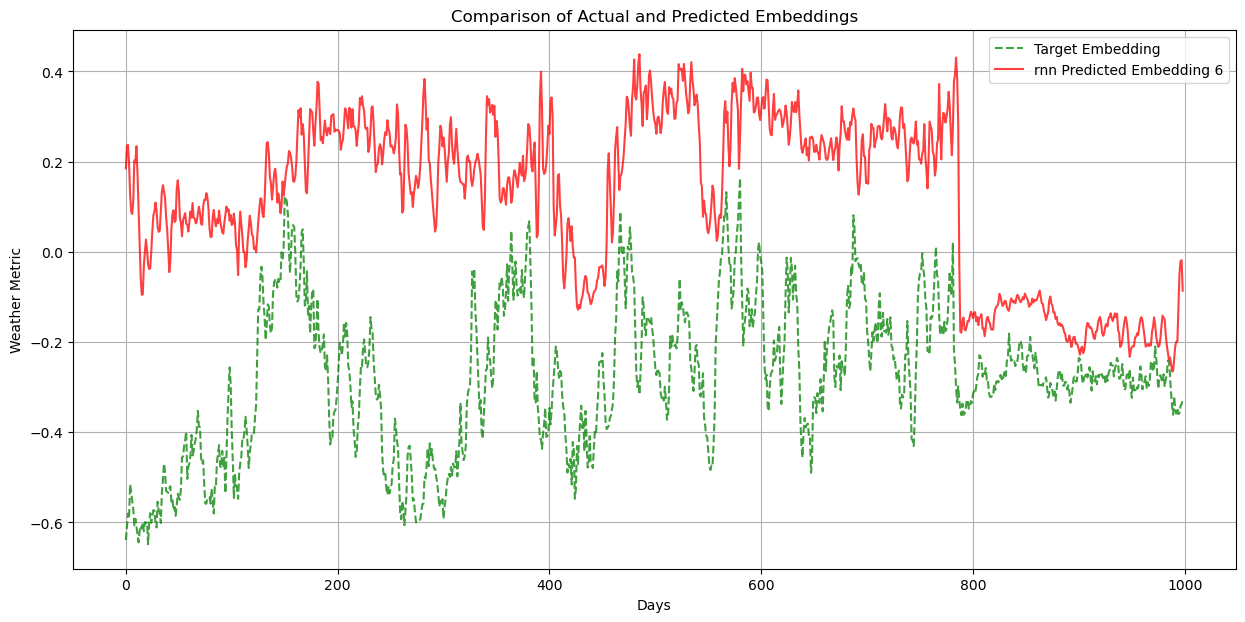

In [86]:
import matplotlib.pyplot as plt

day_start = 0
day_end = 440
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_weather_targets_6[day_start:day_end], label='Target Embedding', linestyle='--', color='green', alpha=0.75)
plt.plot(selected_batch_predictions_6[day_start:day_end], label='rnn Predicted Embedding 6', linestyle='-', color='red', alpha=0.75)

plt.title('Comparison of Actual and Predicted Weather')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
# plt.legend()
plt.grid(True)
plt.show()


day_start = 10 *220
day_end = 11*220
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_weather_targets_6[day_start:day_end], label='Target Embedding', linestyle='--', color='green', alpha=0.75)
plt.plot(selected_batch_predictions_6[day_start:day_end], label='rnn Predicted Embedding 6', linestyle='-', color='red', alpha=0.75)

plt.title('Comparison of Actual and Predicted Embeddings')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()

day_start = -1000
day_end = -1
plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_weather_targets_6[day_start:day_end], label='Target Embedding', linestyle='--', color='green', alpha=0.75)
plt.plot(selected_batch_predictions_6[day_start:day_end], label='rnn Predicted Embedding 6', linestyle='-', color='red', alpha=0.75)

plt.title('Comparison of Actual and Predicted Embeddings')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()


addidtional Model Evaluation Adjustments

In [132]:
def calculate_metrics(outputs, targets):
    # You can define any metric here, such as mean squared error
    mse = nn.MSELoss()(outputs, targets)
    return mse.item()

# Adjust the main training loop to include metric calculation
for epoch in range(num_epochs):
    # Existing training and validation loops here

    # Calculate additional metrics or diagnostics
    train_mse = calculate_metrics(all_outputs, torch.cat([y for _, y in train_loader], dim=0))
    val_mse = calculate_metrics(all_val_outputs, torch.cat([y for _, y in val_loader], dim=0))

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f} \tTrain MSE: {train_mse:.4f} \tVal MSE: {val_mse:.4f}')

Epoch 1 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 101 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 201 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 301 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 401 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 501 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 601 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 701 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 801 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	Val MSE: 289.6269
Epoch 901 	Training Loss: 238.7952 	Validation Loss: 289.6269 	Train MSE: 238.7952 	

In [367]:
from datetime import datetime

# Get the current date and time formatted as a string (e.g., "2023-03-28_15-30-45")
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [368]:
rnn_save_path = f'rnn_models/rnn_model_{num_epochs}_{mouse}_{current_datetime}.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)

# Loading the model
neural_rnn_loaded = NeuralRNN()  # Ensure it has the same architecture
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set to evaluation mode if inference only

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()


NeuralRNN(
  (rnn): RNN(3, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [76]:
# # Assuming you have tensors input_tensor and target_tensor prepared
# loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

# num_epochs = 5000

# # Example training loop
# for epoch in range(num_epochs):
#     optimizer.zero_grad()               # Clear existing gradients
#     output_tensor = neural_rnn(input_tensor)  # Get the model's predictions
#     loss = loss_function(output_tensor, target_tensor)  # Calculate the loss
#     loss.backward()                     # Compute gradient of the loss wrt model parameters
#     optimizer.step()    
#                     # Perform a single optimization step
#     # print every 25 epochs
#     if epoch % 150 == 0:
#         print(f"Epoch {epoch}: Loss = {loss.item()}")


### 4. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error